In [2]:
! pip install scikit-plot

In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install lightgbm

In [6]:
import pandas as pd
import numpy as np
from time import time
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import requests
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split,cross_val_predict, RandomizedSearchCV,cross_validate,cross_val_score
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report, roc_curve, auc, plot_roc_curve, f1_score, roc_auc_score, balanced_accuracy_score,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import scikitplot as skplt
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN,KMeansSMOTE,SVMSMOTE,BorderlineSMOTE

import shap
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [7]:
#upload the daya here    ## anevase ta data sou trexontas auto kai meta tha ta dianasei kanonika apo ton kodika
#from google.colab import files
#uploaded = files.upload()

In [8]:
train=pd.read_csv('train_data.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [9]:
test=pd.read_csv('test_data.csv')
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [10]:
dictionary = pd.read_csv('train_data_dictionary.csv')
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [11]:
sample = pd.read_csv('sample_sub.csv')
sample.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [13]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [14]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

**WE DESIDE TO CONVERT  ΝΑΝ VALUES WITH MODE ON COLUMNS  'BED GRADE' & 'CITY CODE PATIENT'**

In [16]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [17]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [18]:
train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


**WE OBSERVE THAT  MOST PATIENTS ENTRIES ARE ON AGE 21-30 AND 11-20**

<AxesSubplot:>

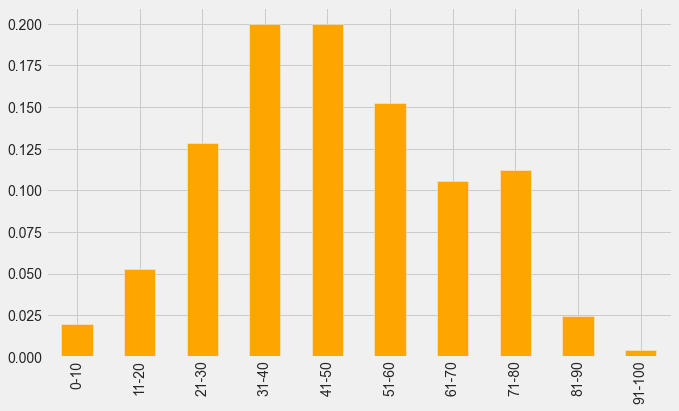

In [19]:
train['Age'].value_counts(normalize=True,sort=True).sort_index().plot.bar(figsize=(10, 6), color='orange')

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64


<AxesSubplot:>

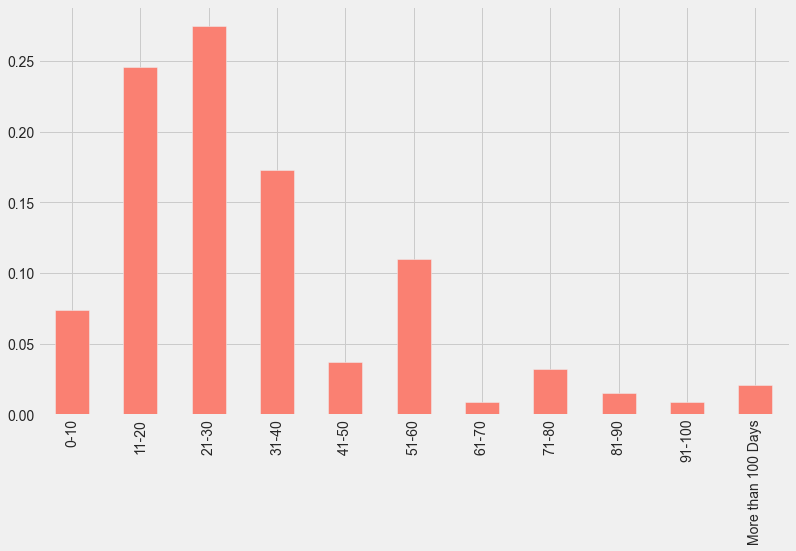

In [20]:
# Distribution of target feature
print(train.Stay.value_counts())
plt.figure(figsize=(10,7))
train.Stay.value_counts(normalize=True).sort_index().plot(kind="bar", figsize=(12, 7),color = ['Salmon'])

In [21]:
# Check for unique values in every column
for features in train.columns:
    print('Unique Values for {}'.format(features))
    print(train[features].unique())
    print('======================================')
    print()

Unique Values for case_id
[     1      2      3 ... 318436 318437 318438]

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]

Unique Values for Hospital_region_code
['Z' 'X' 'Y']

Unique Values for Available Extra Rooms in Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']

Unique Values for Bed Grade
[2. 3. 4. 1.]

Unique Values for patientid
[ 31397  63418   8088 ... 125235  91081  21641]

Unique Values for City_Code_Patient
[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 

## **Data Processing & Feature engineering**


##**WE DROP THE COLUMNS ABOVE BOTH TRAIN AND  TEST DATASET**

In [22]:
train = train.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)
test = test.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)

In [23]:
# Combine test and train dataset for processing
combined = [train, test]

###**USING LABEL ENCODER  ON TRAIN AND TEST DATASET**

In [24]:
from sklearn.preprocessing import LabelEncoder

for dataset in combined:
    label = LabelEncoder()
    dataset['Department'] = label.fit_transform(dataset['Department'])
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [25]:
train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,3,2,5,0,0,2,51-60,4911.0,0-10
1,2,2,2,5,2,3,3,5,1,0,2,51-60,5954.0,41-50
2,3,10,4,1,2,1,3,4,1,0,2,51-60,4745.0,31-40
3,4,26,1,2,2,3,2,3,1,0,2,51-60,7272.0,41-50
4,5,26,1,2,2,3,3,3,1,0,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,3,3,1,5,0,2,3,41-50,4144.0,11-20
318434,318435,24,0,1,2,1,1,4,2,2,4,81-90,6699.0,31-40
318435,318436,7,0,4,3,2,2,5,0,1,3,71-80,4235.0,11-20
318436,318437,11,1,2,3,1,1,3,1,1,5,11-20,3761.0,11-20


In [26]:
# Check age distribution


In [27]:
age =train['Age'].value_counts(normalize=True, sort=True)
age

41-50     0.200193
31-40     0.199847
51-60     0.152350
21-30     0.128260
71-80     0.112399
61-70     0.105788
11-20     0.052657
81-90     0.024777
0-10      0.019640
91-100    0.004089
Name: Age, dtype: float64

<AxesSubplot:>

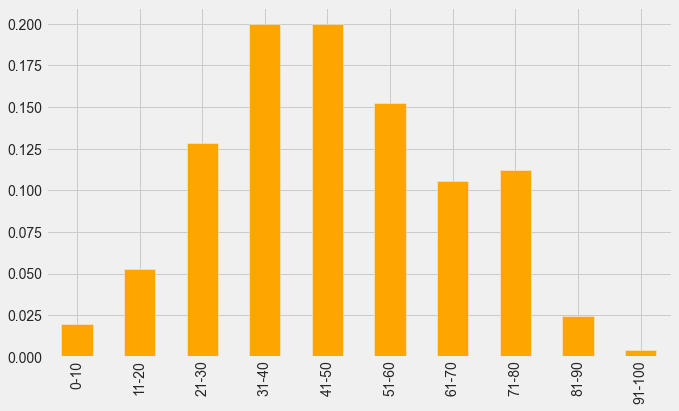

In [28]:
train['Age'].value_counts(normalize=True,sort=True).sort_index().plot.bar(figsize=(10, 6), color='orange')

In [29]:
combined[0].Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [30]:

age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}


In [31]:

for dataset in combined:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())


In [32]:
combined[0].Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

**OUR TARGET GROUP ON 3 SCALES '0-10' - 
'11-20' - '21-ABOVE'**


In [33]:
#stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 2, '41-50': 2, '51-60': 2, '61-70': 2, '71-80': 2, '81-90': 2, '91-100': 2, 'More than 100 Days': 2}

In [34]:
stay_dict = {'0-10': 0, '11-20': 0, '21-30': 1, '31-40': 1, '41-50': 1, '51-60': 1, '61-70': 1, '71-80': 1, '81-90': 1, '91-100': 1, 'More than 100 Days': 1}

In [35]:
combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

<AxesSubplot:xlabel='Stay', ylabel='count'>

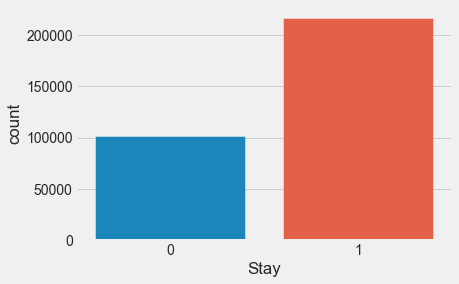

In [36]:
sns.countplot(x=combined[0]['Stay'], data=train)

<AxesSubplot:>

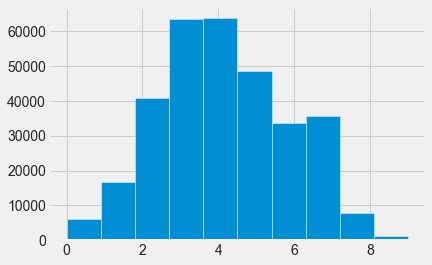

In [37]:
combined[0].Age.hist()

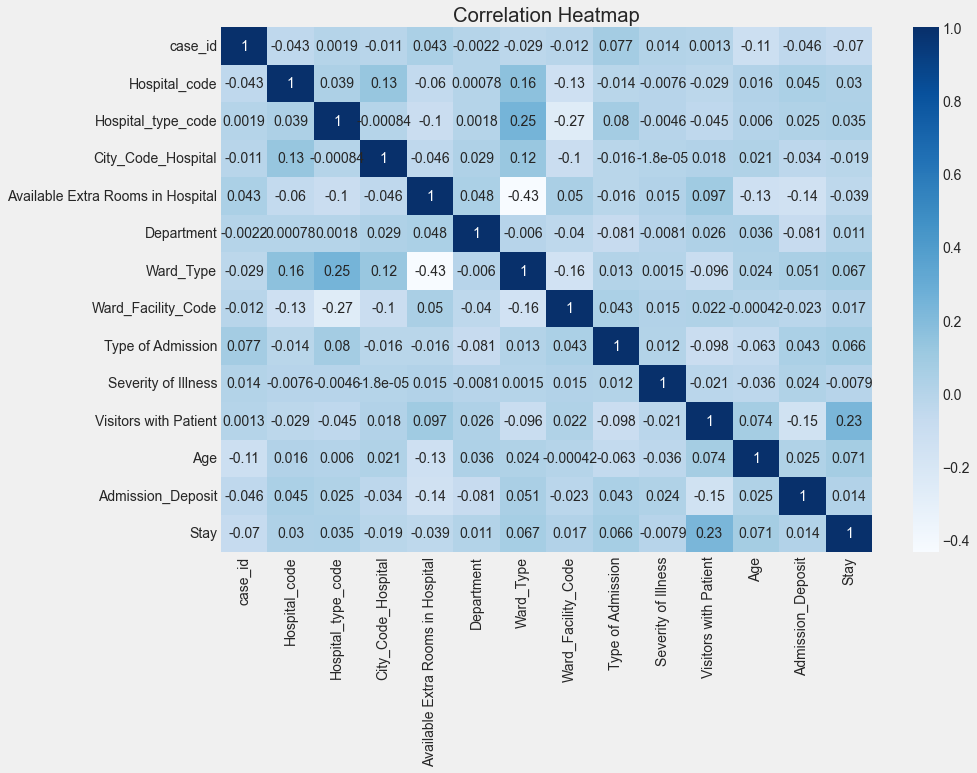

In [38]:
f, ax = plt.subplots(figsize=(13, 9))
plt.title("Correlation Heatmap")
ax=sns.heatmap(train.corr(), annot=True, fmt='.2g',cmap="Blues")

In [39]:
for dataset in combined:
    print(dataset.shape)

(318438, 14)
(137057, 13)


In [40]:
train.info()  # αφορά το train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  int32  
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  int32  
 6   Ward_Type                          318438 non-null  int32  
 7   Ward_Facility_Code                 318438 non-null  int32  
 8   Type of Admission                  318438 non-null  int32  
 9   Severity of Illness                318438 non-null  int32  
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

In [41]:
test.info()   # αφορά  το test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  int32  
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Available Extra Rooms in Hospital  137057 non-null  int64  
 5   Department                         137057 non-null  int32  
 6   Ward_Type                          137057 non-null  int32  
 7   Ward_Facility_Code                 137057 non-null  int32  
 8   Type of Admission                  137057 non-null  int32  
 9   Severity of Illness                137057 non-null  int32  
 10  Visitors with Patient              137057 non-null  int64  
 11  Age                                1370

Scaling Numerical Columns

In [42]:
train['Stay'] 

0         0
1         1
2         1
3         1
4         1
         ..
318433    0
318434    1
318435    0
318436    0
318437    0
Name: Stay, Length: 318438, dtype: int64

In [43]:
train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,3,2,5,0,0,2,5,4911.0,0
1,2,2,2,5,2,3,3,5,1,0,2,5,5954.0,1
2,3,10,4,1,2,1,3,4,1,0,2,5,4745.0,1
3,4,26,1,2,2,3,2,3,1,0,2,5,7272.0,1
4,5,26,1,2,2,3,3,3,1,0,2,5,5558.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,3,3,1,5,0,2,3,4,4144.0,0
318434,318435,24,0,1,2,1,1,4,2,2,4,8,6699.0,1
318435,318436,7,0,4,3,2,2,5,0,1,3,7,4235.0,0
318436,318437,11,1,2,3,1,1,3,1,1,5,1,3761.0,0


<AxesSubplot:xlabel='Stay', ylabel='count'>

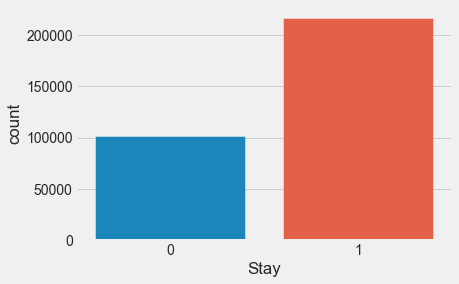

In [44]:
sns.countplot(x=train['Stay'], data=train)

### IMBALANCE DATASET with randomforest

In [45]:
X= train.drop(['case_id','Stay'], axis=1)
y= train['Stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)
y_true, y_pred = y_test, random_forest.predict(X_test)

print(classification_report(y_true, y_pred))
balanced_accuracy_score(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.50      0.43      0.46     20250
           1       0.75      0.80      0.77     43438

    accuracy                           0.68     63688
   macro avg       0.62      0.61      0.62     63688
weighted avg       0.67      0.68      0.67     63688



0.6118613264030641

In [46]:
X_train.shape,y_train.shape

((254750, 12), (254750,))

In [47]:
y_train.value_counts()

1    173257
0     81493
Name: Stay, dtype: int64

In [48]:
X_test.shape, y_test.shape

((63688, 12), (63688,))

### we test SMOTE method for oversampling  with randomForest

AxesSubplot(0.08,0.07;0.87x0.81)
66.06
63.96
              precision    recall  f1-score   support

           0       0.47      0.58      0.52     20250
           1       0.78      0.70      0.74     43438

    accuracy                           0.66     63688
   macro avg       0.63      0.64      0.63     63688
weighted avg       0.68      0.66      0.67     63688



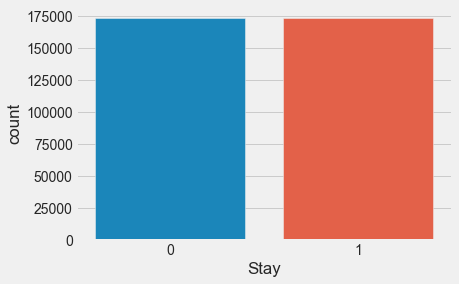

In [49]:
#ADASYN, BorderLine SMOTE, KMeansSMOTE, SVMSMOTE are some of the strategies to select better minority points
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_, ysm_ = sm.fit_resample(X_train, y_train)

print(sns.countplot(x=ysm_))

random_forest = RandomForestClassifier(max_features=2, max_leaf_nodes=19, 
                                        n_estimators=200,random_state=42)              

random_forest.fit(Xsm_, ysm_)

Y_pred = random_forest.predict(X_test)
y_true, y_pred = y_test, random_forest.predict(X_test)

print(round(random_forest.score(X_test, y_test)*100,2))
print(round(balanced_accuracy_score(y_true, y_pred)*100,2))
print(classification_report(y_true, y_pred))

In [50]:
Xsm_.shape,ysm_.shape

((346514, 12), (346514,))

In [51]:
ysm_.value_counts() 

1    173257
0    173257
Name: Stay, dtype: int64

### parameters to be tested - Iterate several times to find better ranges

In [83]:
parameters = {'n_estimators':[200],
    'min_samples_split': [2,20],
    'min_samples_leaf': [1,5],
    'max_leaf_nodes': [18],
    'max_features': [2]
}

# instantiate model
model = RandomForestClassifier(random_state=42)

# grid search using cv
clf = GridSearchCV(model, parameters)
clf.fit(Xsm_, ysm_)

print(clf.best_estimator_)

# make predictions
y_pred= clf.predict(X_test)
print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))

RandomForestClassifier(max_features=2, max_leaf_nodes=18, n_estimators=200,
                       random_state=42)
Accuracy on test set: 66.11%
              precision    recall  f1-score   support

           0       0.47      0.58      0.52     20250
           1       0.78      0.70      0.74     43438

    accuracy                           0.66     63688
   macro avg       0.63      0.64      0.63     63688
weighted avg       0.68      0.66      0.67     63688



### we test ADASYM method fot imbalance sample

In [53]:
ada = ADASYN(sampling_strategy='minority', random_state=42)
X_adasyn, y_adasyn = ada.fit_resample(X_train, y_train)

random_forest = RandomForestClassifier(max_features=2, max_leaf_nodes=19, 
                                        n_estimators=200,random_state=42)     
random_forest.fit(X_adasyn, y_adasyn)

Y_pred = random_forest.predict(X_test)
y_true, y_pred = y_test, random_forest.predict(X_test)

print(round(random_forest.score(X_test, y_test)*100,2))
print(round(balanced_accuracy_score(y_true, y_pred)*100,2))
print(classification_report(y_true, y_pred))

66.81
63.61
              precision    recall  f1-score   support

           0       0.48      0.55      0.51     20250
           1       0.77      0.72      0.75     43438

    accuracy                           0.67     63688
   macro avg       0.63      0.64      0.63     63688
weighted avg       0.68      0.67      0.67     63688



### we test BorderlineSMOTE method fot imbalance sample

In [54]:
sm = BorderlineSMOTE(sampling_strategy='minority',random_state=42)
X_BLSMOTE, y_BLSMOTE = sm.fit_resample(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=200)      
random_forest.fit(X_BLSMOTE, y_BLSMOTE)

Y_pred = random_forest.predict(X_test)
y_true, y_pred = y_test, random_forest.predict(X_test)

print(round(random_forest.score(X_test, y_test)*100,2))
print(round(balanced_accuracy_score(y_true, y_pred)*100,2))
print(classification_report(y_true, y_pred))

65.89
62.64
              precision    recall  f1-score   support

           0       0.47      0.54      0.50     20250
           1       0.77      0.72      0.74     43438

    accuracy                           0.66     63688
   macro avg       0.62      0.63      0.62     63688
weighted avg       0.67      0.66      0.66     63688



### feature selection

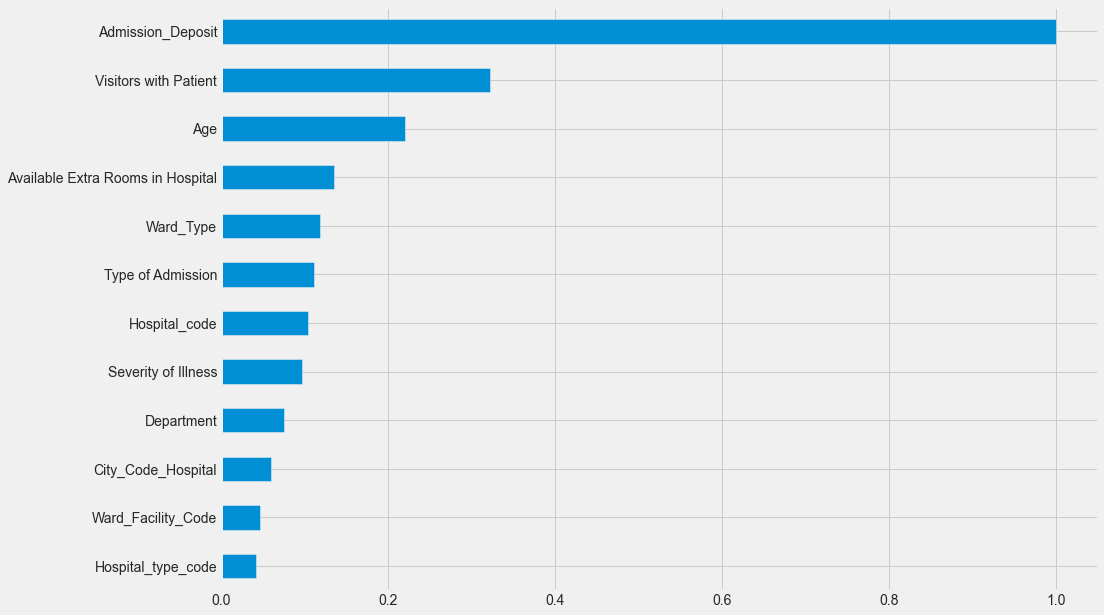

In [84]:
classifier = RandomForestClassifier(class_weight='balanced')
classifier.fit(Xsm_, ysm_)
predictions = classifier.predict(X_test)

importance = pd.Series(classifier.feature_importances_, index=list(X))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False).head(20)
importance.sort_values().plot.barh(figsize=(14,10))
plt.show()

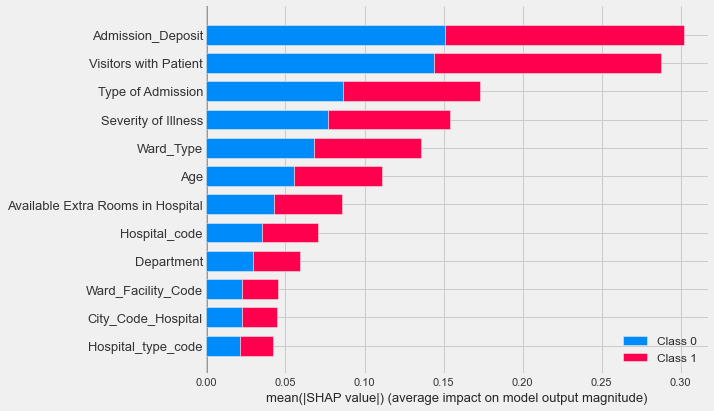

In [85]:
shap_values = shap.TreeExplainer(classifier).shap_values(Xsm_, approximate=True)
shap.summary_plot(shap_values, Xsm_, plot_type="bar")

### we see that if we drop some of the futures we don't have better results so we keep the above result of randomforst classifier with smote method!